In [1]:
import tensorflow as tf
import os

In [2]:
os.path.join('data', 'happy')

'data\\happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = './data'

In [6]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

Looping images to check if they are readable

In [7]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        image_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))
            #os.remove(image_path)

Load Data

In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('./data')

Found 154 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

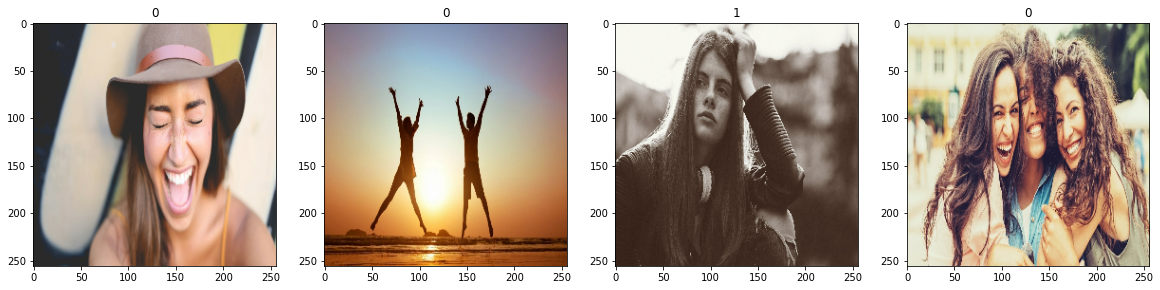

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

preprocessing

scale

In [15]:
data = data.map(lambda x, y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = data.as_numpy_iterator().next()

In [18]:
batch[0].max()

1.0

Split Data

In [19]:
len(data)

5

In [20]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [21]:
val_size+train_size+test_size

5

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Modling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 0.2243 - accuracy: 0.9219 - val_loss: 0.1415 - val_accuracy: 0.9844
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 0.2151 - accuracy: 0.9062 - val_loss: 0.2022 - val_accuracy: 0.9062
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 0.1705 - accuracy: 0.9219 - val_loss: 0.1590 - val_accuracy: 0.9531
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.1495 - accuracy: 0.9688 - val_loss: 0.1111 - val_accuracy: 0.9844
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 0.1620 - accuracy: 0.8906 - val_loss: 0.0904 - val_accuracy: 0.9688
Epoch 6/20
2/2 [==============================] - 4s 2s/step - loss: 0.1121 - accuracy: 0.9531 - val_loss: 0.1036 - val_accuracy: 0.9688
Epoch 7/20
2/2 [==============================] - 4s 2s/step - loss: 0.0913 - accuracy: 0.9844 - val_loss: 0.1113 - val_accuracy: 0.9688
Epoch 8/20
2/2 [=========================

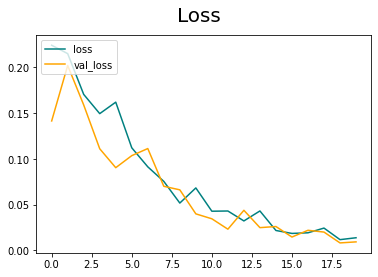

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

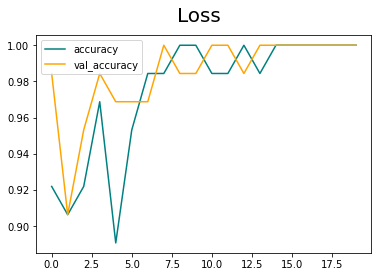

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluate Preformance

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

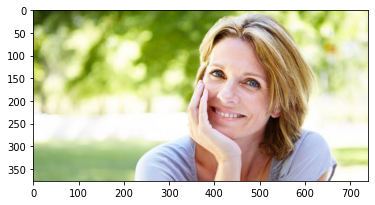

In [46]:
img = cv2.imread('./happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

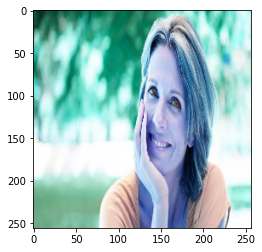

In [47]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [49]:
yhat

array([[0.73340476]], dtype=float32)

In [50]:
if yhat > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


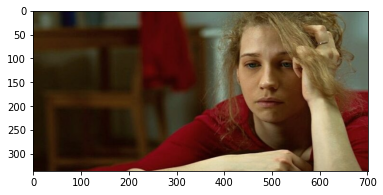

In [51]:
img = cv2.imread('./sad-test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

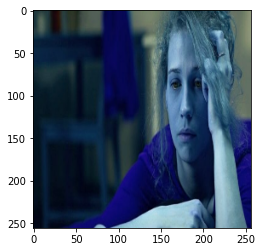

In [52]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [54]:
yhat

array([[0.98578525]], dtype=float32)

In [55]:
if yhat > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


Save The Model

In [56]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [61]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [62]:
new_model

In [63]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.98578525]], dtype=float32)